# Tensors: The Basic Data Structure of PyTorch:
Tensors are pretty much analogous to NumPy's `ndarray` class. They have all of the same functionality, but with some important additions that will show up in later notebooks.

In [11]:
from __future__ import print_function
import torch
import numpy as np
import seaborn as sns

In [4]:
x = torch.empty(5, 3)
x

tensor([[9.9184e-39, 8.4490e-39, 9.6428e-39],
        [1.1112e-38, 9.5511e-39, 1.0102e-38],
        [1.0286e-38, 1.0194e-38, 9.6429e-39],
        [9.2755e-39, 9.1837e-39, 9.3674e-39],
        [1.0745e-38, 1.0653e-38, 9.5510e-39]])

In [5]:
x = torch.rand(5, 3)
x

tensor([[0.1100, 0.8284, 0.3242],
        [0.8287, 0.9312, 0.2708],
        [0.2149, 0.7279, 0.3743],
        [0.4195, 0.5728, 0.9357],
        [0.7800, 0.9427, 0.2571]])

In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

(tensor(-0.0011, dtype=torch.float64), tensor(0.9995, dtype=torch.float64))

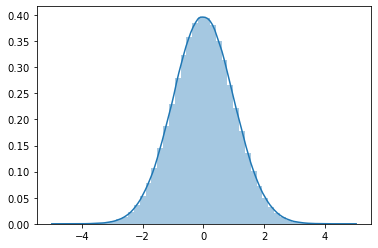

In [26]:
x = torch.tensor(np.random.randn(int(1e6), ))
sns.distplot(x)
x.mean(), x.std()

0.00039382084950552714, 0.9987959113118025


tensor([False, False, False,  ..., False, False, False])

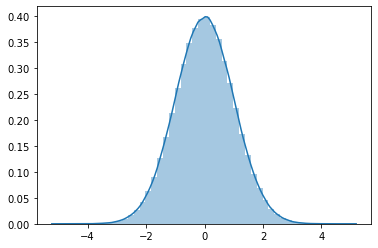

In [32]:
y = torch.randn_like(x)
sns.distplot(y)
print(f'{y.mean()}, {y.std()}')
x == y

In [33]:
x.size()

torch.Size([1000000])

In [36]:
x + y

tensor([-2.0687, -0.9971,  0.3215,  ...,  0.0911,  0.3644,  0.3771],
       dtype=torch.float64)

In [39]:
result = torch.empty(int(1e6))
torch.add(x, y, out=result)
result

tensor([-2.0687, -0.9971,  0.3215,  ...,  0.0911,  0.3644,  0.3771])

In [40]:
# Inplace addition y += x
y.add_(x)
y

tensor([-2.0687, -0.9971,  0.3215,  ...,  0.0911,  0.3644,  0.3771],
       dtype=torch.float64)

In [42]:
x = torch.randn(5, 5)
x[:,1]

tensor([-0.9658, -0.3221,  1.5326,  0.2478,  0.0644])

In [56]:
x = torch.randn(2,2,3)

In [64]:
x[:,0, :]

tensor([[-0.4829,  0.8091,  1.0755],
        [ 1.3359, -0.0591, -1.6734]])

In [68]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
x.shape, y.shape, z.shape

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

In [71]:
x = torch.randn(1)
x

tensor([-1.7148])

In [73]:
type(x.item()), x.item()

(float, -1.7147852182388306)

In [79]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [80]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [81]:
a.add_(1)
a, b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [83]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
a, b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

In [85]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

In [86]:
torch.cuda.is_available()

False